In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
dataset

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [82]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    

df=pd.DataFrame(te_ary, columns=te.columns_)  
df


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


<h3>total de vente pour chaque produit</h3>

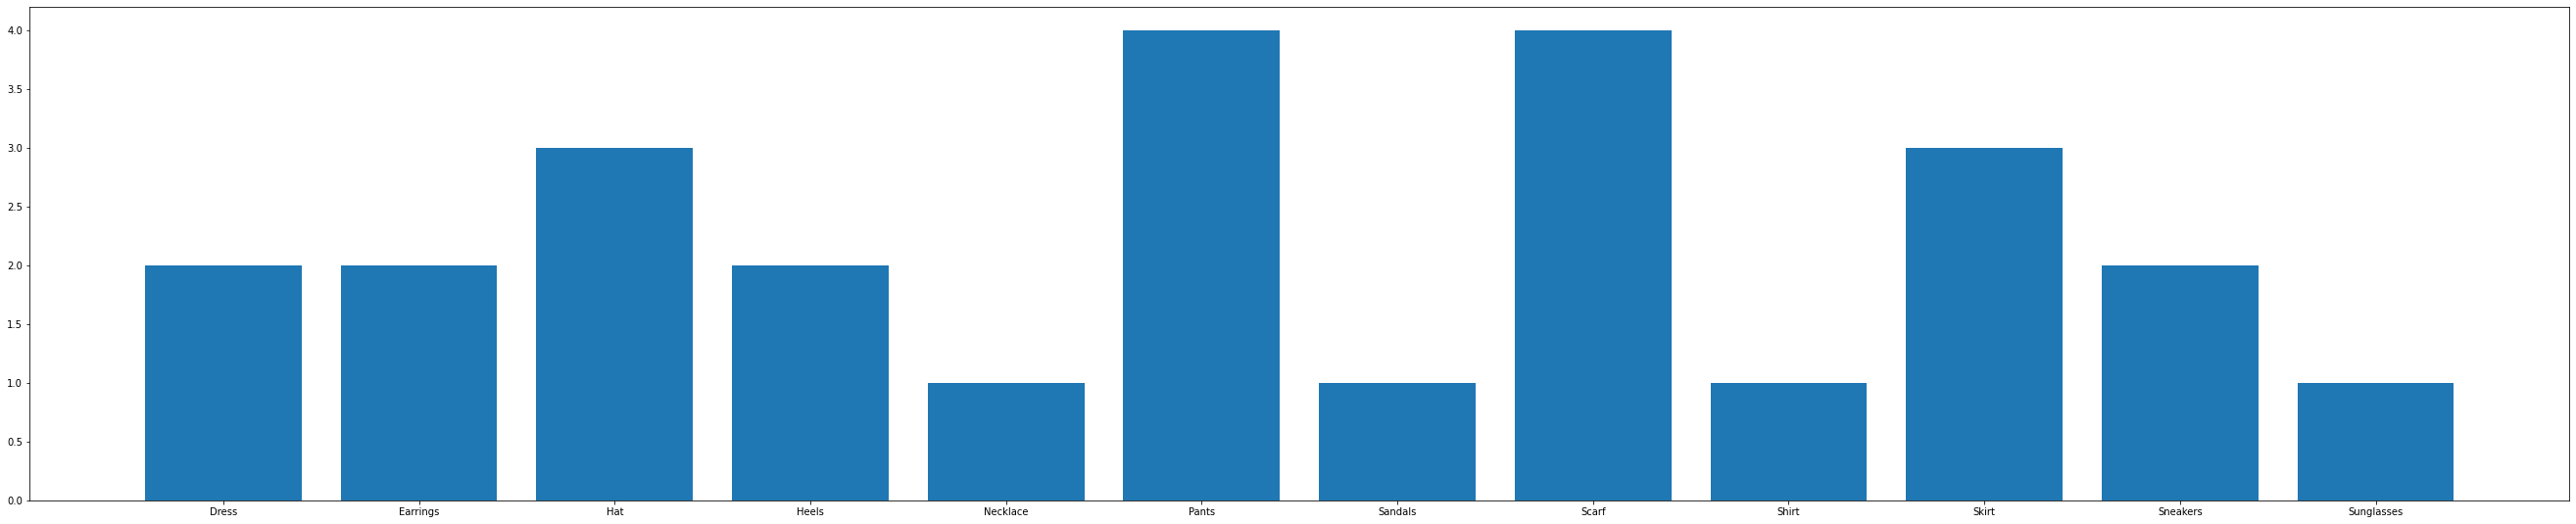

In [83]:
total =[]
for lab in te.columns_:
    total.append(df[lab].value_counts()[True])

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(te.columns_,total)
plt.show()



<h3>la relation entre les fonctionnalités</h3>

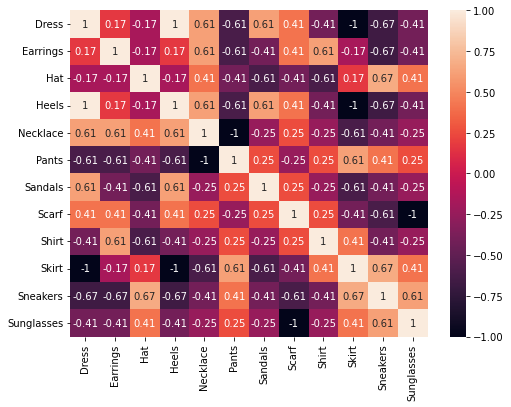

In [84]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [85]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


on peut en deduire que les client ont tendance a acheter c'est quatre produit (Hat,Pants,Scarf,Skirt) 

In [86]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


on voir ici qu'a chaque fois un client achete un Pants il est fore probable qu'il achete un Skirt ou Scarf et a chaque fois qu'il achete un Skirt il achete aussi un Pants. 

<b>donc pour maximise le revenus de l'entreprise donc il faut investire plus sur ces produit (Hat,Pants,Scarf,Skirt) et place cote a cote les Pants, les Skirt,et les Scarf</b>

# 2

In [141]:
df=pd.read_csv('Market_Basket_Optimisation.csv' ,  header  =  None ) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> calcule du total de chaque produit dans une colone</b>

In [138]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):
    df_res = df_res.append(df[i].value_counts())
    
df_res


,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,cauliflower,ketchup,cream,body spray,oatmeal,tea,water spray,zucchini,napkins,asparagus
0,577.0,576.0,458.0,391.0,373.0,354.0,325.0,293.0,279.0,270.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,484.0,78.0,11.0,223.0,234.0,411.0,153.0,78.0,302.0,101.0,...,1.0,5.0,1.0,13.0,4.0,5.0,1.0,10.0,NaN,NaN
2,375.0,NaN,NaN,174.0,87.0,279.0,48.0,21.0,225.0,50.0,...,1.0,2.0,1.0,14.0,5.0,4.0,1.0,2.0,NaN,NaN
3,201.0,NaN,NaN,143.0,18.0,167.0,9.0,1.0,181.0,55.0,...,3.0,6.0,1.0,9.0,6.0,1.0,1.0,9.0,1.0,NaN
4,84.0,NaN,NaN,115.0,2.0,62.0,NaN,NaN,134.0,45.0,...,4.0,3.0,1.0,15.0,2.0,4.0,NaN,17.0,2.0,NaN
5,44.0,NaN,NaN,71.0,1.0,23.0,1.0,NaN,102.0,28.0,...,9.0,5.0,2.0,9.0,5.0,3.0,NaN,6.0,NaN,NaN
6,14.0,NaN,NaN,36.0,NaN,8.0,NaN,NaN,59.0,17.0,...,4.0,3.0,NaN,10.0,2.0,4.0,NaN,7.0,NaN,NaN
7,5.0,NaN,NaN,38.0,NaN,2.0,NaN,NaN,28.0,15.0,...,1.0,3.0,NaN,3.0,2.0,3.0,NaN,5.0,1.0,1.0
8,2.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,19.0,8.0,...,5.0,NaN,NaN,5.0,3.0,2.0,NaN,10.0,NaN,NaN
9,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,10.0,5.0,...,4.0,1.0,NaN,5.0,3.0,1.0,NaN,2.0,1.0,NaN


<b> somme de chaque produit</b>

In [127]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

<b> visualisation des 50 produit les plus vendut </b>

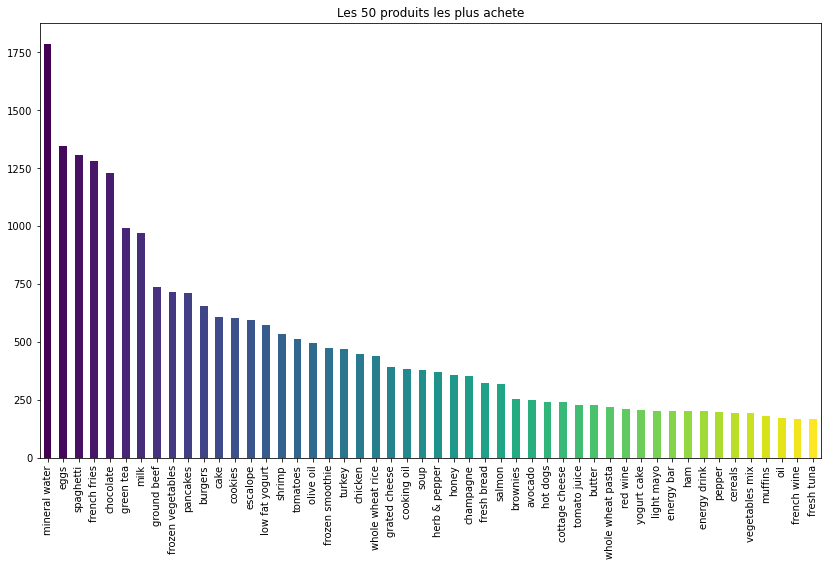

In [142]:
plt.figure(figsize=(14,8))
plt.title("Les 50 produits les plus achete")
color = plt.cm.viridis(np.linspace(0, 1, 50))
df_sum.head(50).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()


In [130]:
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)

<b>convertion en donne transactionnelle

In [143]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [144]:
data = data.drop(columns=['nan'])

In [134]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


<b> application de l'algorithme de Apriori </b>

In [135]:
association_rules(frequent_itemsets,metric="lift",min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
